In [1]:
# PCA (Analisis de componente principal)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data=data[[e for e in data.columns if e!= 'target_class']]
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [7]:
# normalizacion

data_rescaled_mano=(data-np.mean(data))/np.std(data)
data_rescaled=StandardScaler().fit_transform(data)

np.sum(data_rescaled-data_rescaled_mano)

 Mean of the integrated profile                  0.000000e+00
 Standard deviation of the integrated profile    1.115067e-10
 Excess kurtosis of the integrated profile       3.456999e-11
 Skewness of the integrated profile              7.172045e-12
 Mean of the DM-SNR curve                       -1.174245e-11
 Standard deviation of the DM-SNR curve          9.144349e-11
 Excess kurtosis of the DM-SNR curve            -2.822222e-11
 Skewness of the DM-SNR curve                   -1.180685e-11
dtype: float64

In [8]:
data_rescaled_mano=(data-np.min(data))/(np.max(data)-np.min(data))
data_rescaled=MinMaxScaler().fit_transform(data)

np.sum(data_rescaled-data_rescaled_mano)

 Mean of the integrated profile                 -1.568736e-13
 Standard deviation of the integrated profile   -5.605374e-14
 Excess kurtosis of the integrated profile      -1.882314e-13
 Skewness of the integrated profile             -2.829209e-14
 Mean of the DM-SNR curve                       -1.212409e-13
 Standard deviation of the DM-SNR curve         -4.598752e-14
 Excess kurtosis of the DM-SNR curve             2.881462e-13
 Skewness of the DM-SNR curve                   -6.918713e-14
dtype: float64

In [9]:
data_rescaled=StandardScaler().fit_transform(data)

In [13]:
pca=PCA()
pca.fit(data_rescaled)
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

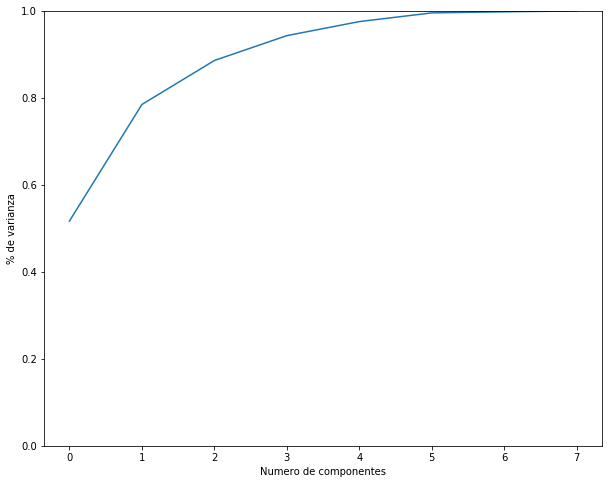

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% de varianza')
plt.ylim([0,1])
plt.show();

In [23]:
pca=PCA(n_components=5)
df=pd.DataFrame(pca.fit_transform(data_rescaled))
df.head()

,0,1,2,3,4
0,-1.278849,-1.273133,0.016213,0.662102,0.577362
1,-1.020553,-0.201162,0.670478,1.605779,-0.390326
2,0.188289,0.432114,-0.979766,-0.519232,-0.305346
3,-1.015466,-1.469881,-0.018832,0.938386,0.495189
4,-0.822626,2.123651,0.407953,-0.380922,-0.654083


In [24]:
pd.DataFrame(data_rescaled).head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [25]:
pd.DataFrame(pca.inverse_transform(df)).head()

,0,1,2,3,4,5,6,7
0,1.156722,1.338373,-0.650692,-0.411991,-0.379564,-0.295096,-0.068565,-0.264716
1,-0.328871,1.803710,0.002397,-0.380840,-0.425600,-0.561543,0.416077,0.293707
2,-0.286647,-1.052225,-0.076029,-0.162948,-0.405896,-0.139841,-0.141241,-0.344996
3,0.991747,1.559323,-0.535180,-0.373068,-0.345561,-0.204928,-0.267297,-0.494321
4,-0.853596,-0.861573,0.159683,-0.135614,-0.403524,-0.754626,1.301144,1.409208


In [26]:
# ICA (Analisis de componente independiente)

# Problema de la fiesta

from scipy import signal
from sklearn.decomposition import FastICA

In [27]:
time=np.linspace(0,8, 2000)

s1=np.sin(2*time)  # señal 1 - seno
s2=np.sign(np.sin(3*time)) # señal 2 - onda cuadrada
s3=signal.sawtooth(2*np.pi*time) # señal 3 - dientes de sierra

In [39]:
S=np.c_[s1,s2,s3]
#S+=0.2*np.random.normal(size=S.shape)
#S/=S.std(axis=0)

In [40]:
A=np.array([[1,1,1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X=np.dot(S, A.T)   # observaciones

In [41]:
ica=FastICA(n_components=3)
S_ica=ica.fit_transform(X) # reconstruye las señales
A_ica=ica.mixing_

In [42]:
pca=PCA(n_components=3)
S_pca=pca.fit_transform(X)

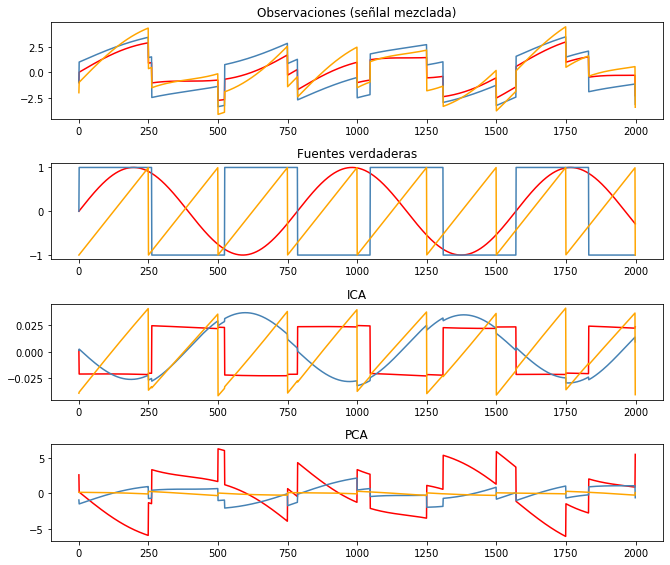

In [43]:
# plots
plt.figure(figsize=(10,8))
modelos=[X, S, S_ica, S_pca]
nombres=['Observaciones (señlal mezclada)', 'Fuentes verdaderas', 'ICA', 'PCA']
colores=['red', 'steelblue', 'orange']

for i,(m,n) in enumerate(zip(modelos, nombres)):
    plt.subplot(4,1,i+1)
    plt.title(n)
    for sig,c in zip(m.T, colores):
        plt.plot(sig, color=c)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show();

In [44]:
# UMAP (Uniform Manifold Aprox and Projection)

import umap
import seaborn as sns
from sklearn.datasets import load_iris

In [45]:
load_iris().data.shape

(150, 4)

In [47]:
redu=umap.UMAP(n_components=2).fit_transform(load_iris().data)
redu.shape

/Users/data/Library/Python/3.7/lib/python/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

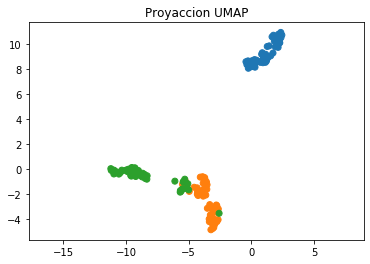

In [51]:
plt.scatter(redu[:,0], redu[:,1], c=[sns.color_palette()[x] for x in load_iris().target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyaccion UMAP')
plt.show();

In [52]:
# load_iris()

In [53]:
# Time Series

df=pd.read_csv('data/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [54]:
df['datetime']=pd.to_datetime(df.date)
df=df.set_index(df.datetime)
df.drop(columns=['date'], inplace=True)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
datetime,,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:00:00
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 15:00:00
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 16:00:00
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 17:00:00
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 18:00:00


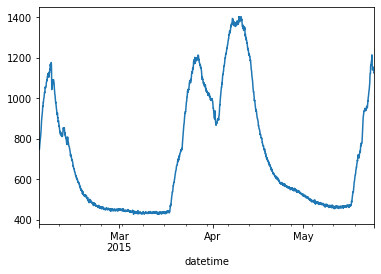

In [56]:
df.CO2.plot();

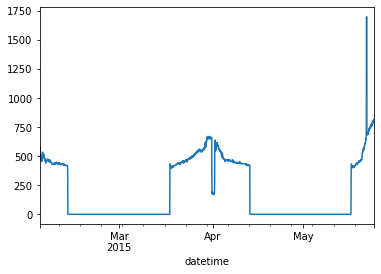

In [57]:
df.Light.plot();

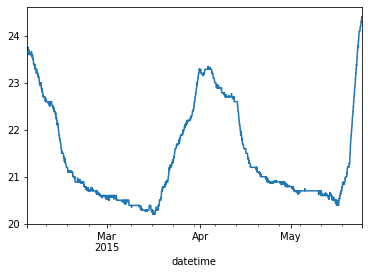

In [58]:
df.Temperature.plot();

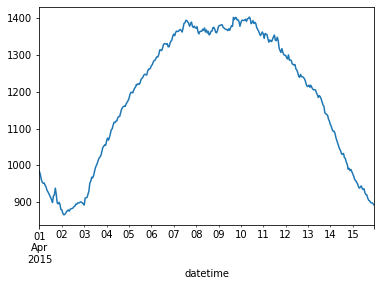

In [63]:
import statsmodels.api as sm
dias=df.CO2.loc['2015-4-1': '2015-4-15']
dias.plot();

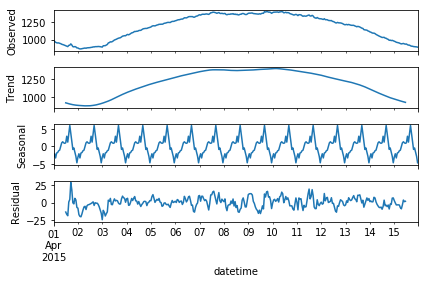

In [68]:
res=sm.tsa.seasonal_decompose(dias)
resplot=res.plot()

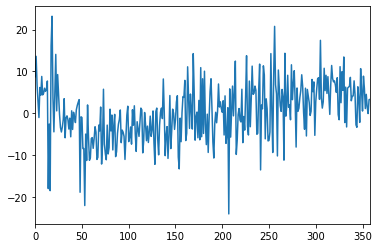

In [69]:
V=dias.copy()
dV=V[:-1].reset_index(drop=True)-V[1:].reset_index(drop=True)
dV.plot()

In [70]:
# https://es.wikipedia.org/wiki/Diferencia_finita

def derivada(data):
    data=pd.Series(data)
    return pd.Series((data[1:].values)-(data[:-1].values))

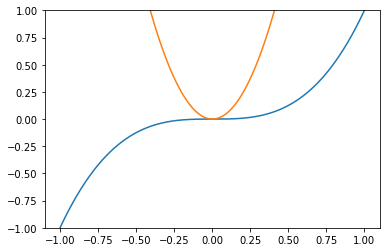

In [71]:
x=np.linspace(-1,1,1000)
y=x**3

plt.plot(x, y)
plt.plot(x[1:], derivada(y)*1000)
plt.ylim(-1,1)
plt.show()

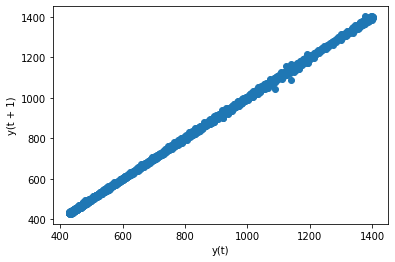

In [72]:
# lagplot

from pandas.plotting import lag_plot
lag_plot(df.CO2);

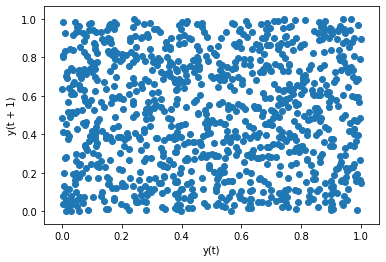

In [74]:
lag_plot(pd.Series(np.random.random(1000)));

In [75]:
df.CO2.head()

datetime
2015-02-02 14:00:00    749.200000
2015-02-02 15:00:00    760.400000
2015-02-02 16:00:00    769.666667
2015-02-02 17:00:00    774.750000
2015-02-02 18:00:00    779.000000
Name: CO2, dtype: float64

In [87]:
# AR
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.ar_model import AR

train, test=df.CO2[:-10], df.CO2[-10:]
modelo=AR(train).fit()
pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)  # mae
print ('Cota de error : {}'.format(error))

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Cota de error : 15.945951493728057


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1152.958812,-0.291188
2015-05-24 05:00:00,1152.400000,1152.627357,0.227357
2015-05-24 06:00:00,1146.166667,1153.235932,7.069265
2015-05-24 07:00:00,1145.400000,1154.050327,8.650327
2015-05-24 08:00:00,1140.800000,1154.395504,13.595504
2015-05-24 09:00:00,1150.250000,1154.473304,4.223304
2015-05-24 10:00:00,1129.200000,1156.070730,26.870730
2015-05-24 11:00:00,1125.800000,1157.665545,31.865545
2015-05-24 12:00:00,1123.000000,1157.195279,34.195279
2015-05-24 13:00:00,1124.000000,1156.471016,32.471016


In [93]:
for i in range(1, 100, 1):
    modelo=AR(train).fit(maxlag=i)
    pred=modelo.predict(len(train), len(df.CO2)-1)
    error=(pred-test).abs().sum()/len(pred)  # mae
    print ('Cota de error : {}'.format(error), 'lags: ', i)

Cota de error : 15.016314895082996 lags:  1
Cota de error : 15.671845543327482 lags:  2
Cota de error : 15.965939360431548 lags:  3
Cota de error : 17.610677870206292 lags:  4
Cota de error : 19.218907987275408 lags:  5
Cota de error : 17.037163792618436 lags:  6
Cota de error : 15.554671590315479 lags:  7
Cota de error : 11.739144011618965 lags:  8
Cota de error : 9.474424179621632 lags:  9
Cota de error : 8.5088715235642 lags:  10
Cota de error : 7.62305791780957 lags:  11
Cota de error : 7.167227874348692 lags:  12
Cota de error : 6.4012710097818175 lags:  13
Cota de error : 5.262625596524868 lags:  14
Cota de error : 4.994674385258532 lags:  15
Cota de error : 4.97313474455018 lags:  16
Cota de error : 5.648775616965918 lags:  17
Cota de error : 6.504834015333654 lags:  18
Cota de error : 7.298557479297505 lags:  19
Cota de error : 7.7277246585661485 lags:  20
Cota de error : 9.742344952804956 lags:  21
Cota de error : 11.378984920719905 lags:  22
Cota de error : 12.987173157153142

In [91]:
# ARMA

from statsmodels.tsa.arima_model import ARMA

modelo=ARMA(train, order=(16, 2)).fit()   #p=>AR, q=>MA
pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)  # mae
print ('Cota de error : {}'.format(error))

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Cota de error : 15.777693717671559


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1152.952313,-0.297687
2015-05-24 05:00:00,1152.400000,1152.868154,0.468154
2015-05-24 06:00:00,1146.166667,1152.659835,6.493168
2015-05-24 07:00:00,1145.400000,1154.051068,8.651068
2015-05-24 08:00:00,1140.800000,1153.974257,13.174257
2015-05-24 09:00:00,1150.250000,1154.088734,3.838734
2015-05-24 10:00:00,1129.200000,1155.726933,26.526933
2015-05-24 11:00:00,1125.800000,1157.205316,31.405316
2015-05-24 12:00:00,1123.000000,1156.981241,33.981241
2015-05-24 13:00:00,1124.000000,1156.940379,32.940379


In [95]:
# ARIMA

# ADF-test (mirar si se quiere)
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html


from statsmodels.tsa.arima_model import ARIMA

modelo=ARIMA(train, order=(16, 2, 2)).fit(disp=False)
pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)  # mae
print ('Cota de error : {}'.format(error))

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Cota de error : 1139.2096043623574


,real,pred,diff
2015-05-24 04:00:00,1153.250000,-2.288582,-1155.538582
2015-05-24 05:00:00,1152.400000,-0.264609,-1152.664609
2015-05-24 06:00:00,1146.166667,0.420967,-1145.745700
2015-05-24 07:00:00,1145.400000,1.340260,-1144.059740
2015-05-24 08:00:00,1140.800000,-0.745891,-1141.545891
2015-05-24 09:00:00,1150.250000,-0.901691,-1151.151691
2015-05-24 10:00:00,1129.200000,2.525164,-1126.674836
2015-05-24 11:00:00,1125.800000,-0.067882,-1125.867882
2015-05-24 12:00:00,1123.000000,-1.674338,-1124.674338
2015-05-24 13:00:00,1124.000000,-0.172775,-1124.172775


In [99]:
# SARIMA-SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo=SARIMAX(train, order=(2, 1, 2, 2)).fit()
pred=modelo.predict(len(train), len(df.CO2)-1)
error=(pred-test).abs().sum()/len(pred)  # mae
print ('Cota de error : {}'.format(error))

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Cota de error : 20.934500627596936


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1153.917823,0.667823
2015-05-24 05:00:00,1152.400000,1155.278725,2.878725
2015-05-24 06:00:00,1146.166667,1156.646314,10.479647
2015-05-24 07:00:00,1145.400000,1157.996276,12.596276
2015-05-24 08:00:00,1140.800000,1159.338071,18.538071
2015-05-24 09:00:00,1150.250000,1160.668184,10.418184
2015-05-24 10:00:00,1129.200000,1161.988083,32.788083
2015-05-24 11:00:00,1125.800000,1163.297322,37.497322
2015-05-24 12:00:00,1123.000000,1164.596188,41.596188
2015-05-24 13:00:00,1124.000000,1165.884685,41.884685


In [101]:
# FBProphet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [119]:
# datos, consumo de energia

pjme=pd.read_csv('data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


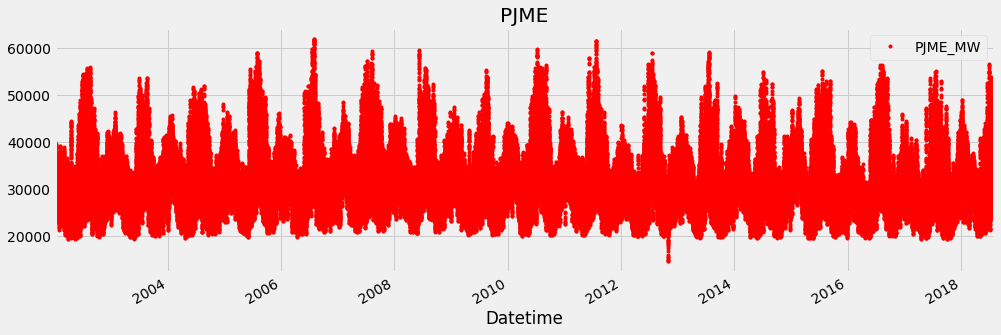

In [114]:
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')

In [115]:
# se definen las caracteristicas temporales

def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [116]:
X, y = features(pjme, 'PJME_MW')
data=pd.concat([X, y], axis=1)
data.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


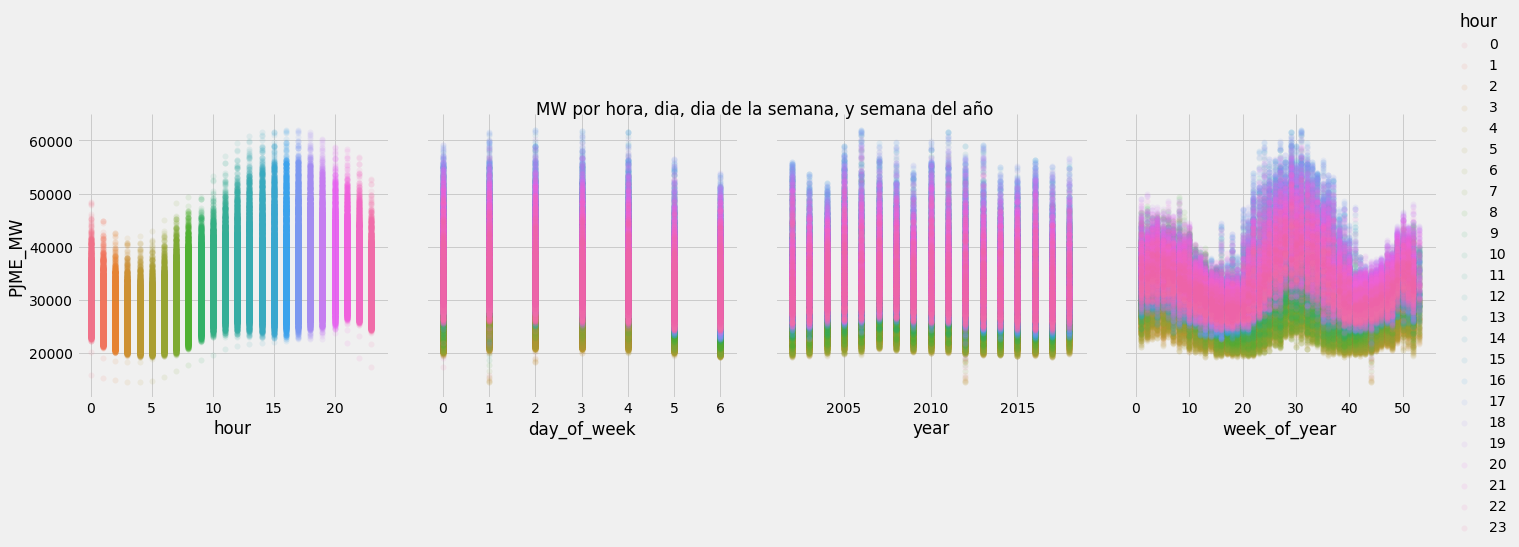

In [118]:
sns.pairplot(data.dropna(), hue='hour', 
            x_vars=['hour', 'day_of_week', 'year', 'week_of_year'],
            y_vars='PJME_MW', height=5, plot_kws={'alpha':0.1, 'linewidth':0})
plt.suptitle('MW por hora, dia, dia de la semana, y semana del año')
plt.show();

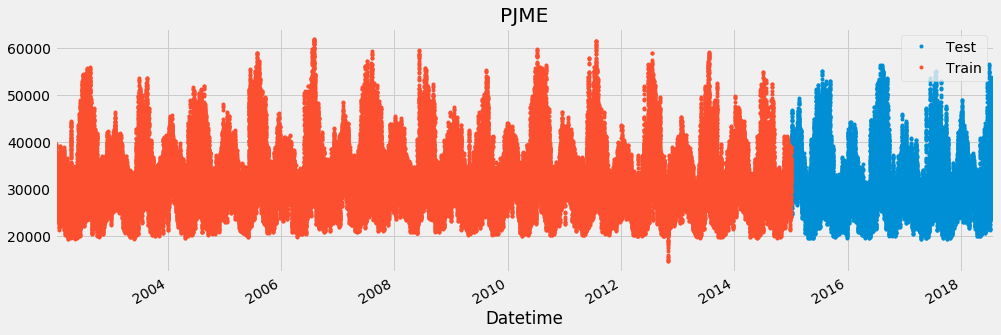

In [120]:
split_date='01-Jan-2015'

train=pjme.loc[pjme.index<=split_date].copy()
test=pjme.loc[pjme.index>split_date].copy()

_=test.rename(columns={'PJME_MW': 'Test'})\
      .join(train.rename(columns={'PJME_MW': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='PJME', style='.')

In [122]:
# modelo

train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
train.head()

,index,ds,y
0,0,2002-12-31 01:00:00,26498.0
1,1,2002-12-31 02:00:00,25147.0
2,2,2002-12-31 03:00:00,24574.0
3,3,2002-12-31 04:00:00,24393.0
4,4,2002-12-31 05:00:00,24860.0


In [123]:
modelo=Prophet().fit(train)

In [124]:
pred=modelo.predict(test)

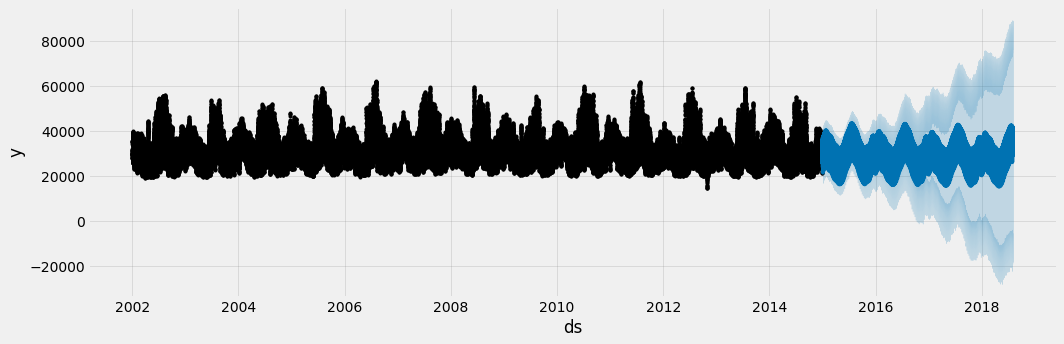

In [125]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig=modelo.plot(pred, ax=ax)


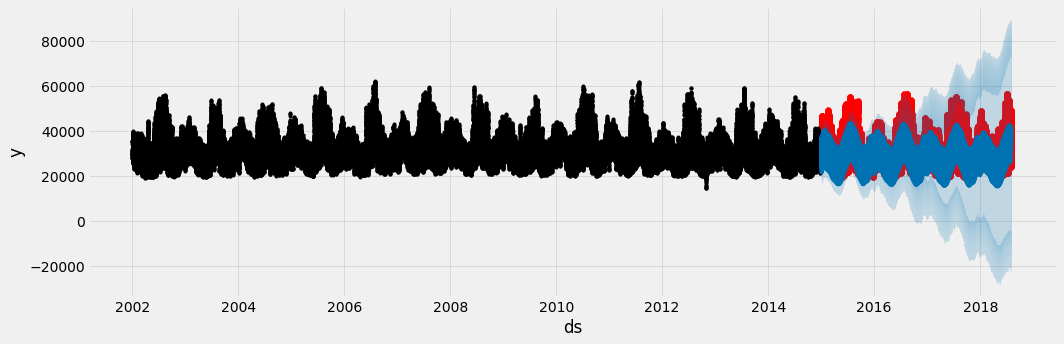

In [126]:
# comparando

f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [129]:
# metricas de error

mean_squared_error(test.y, pred.yhat)**0.5

6617.582523051441

In [128]:
mean_absolute_error(test.y, pred.yhat)

5182.773042911244

In [130]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [131]:
mape(test.y, pred.yhat)

16.510175822754576

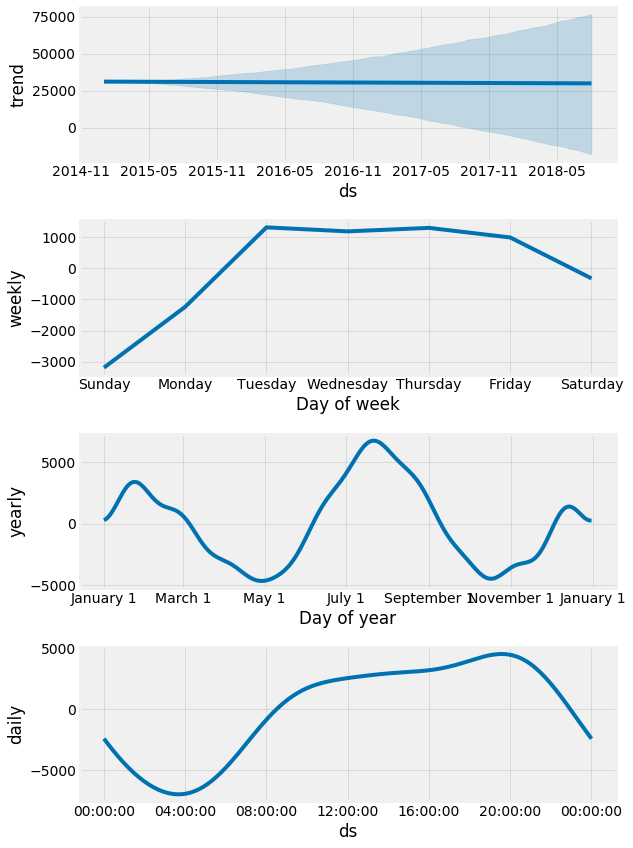

In [133]:
fig = modelo.plot_components(pred)

In [134]:
# Con vacaciones

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_h = cal.holidays(train.index.min(), train.index.max())
test_h = cal.holidays(test.index.min(), test.index.max())

In [135]:
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])
df_h = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})
df_h['holiday'] = 'USFederalHoliday'
df_h = df_h.drop(['PJME_MW','date','is_holiday'], axis=1)
df_h.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


In [136]:
modelo_h = Prophet(holidays=df_h).fit(train)

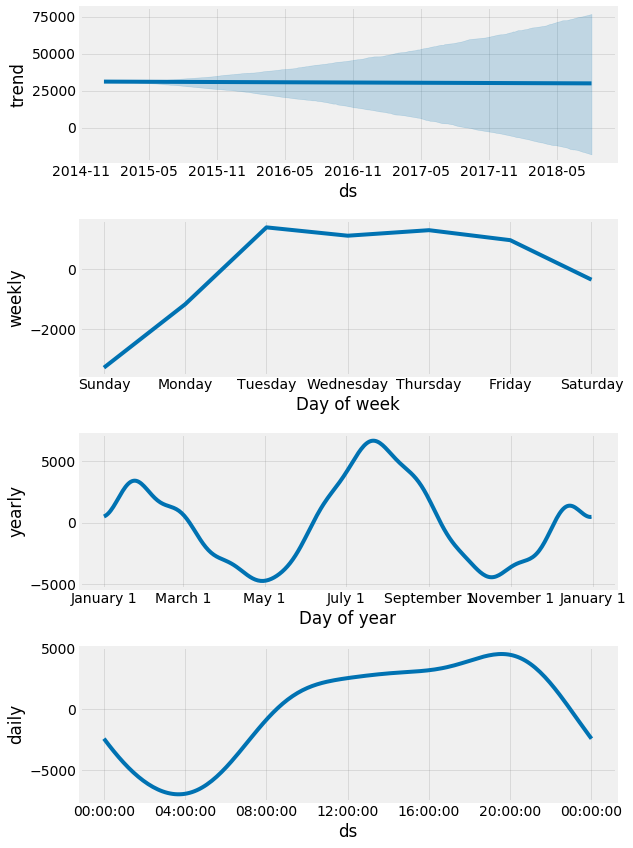

In [137]:
fig2=modelo_h.plot_components(pred)

In [138]:
pred_h=modelo.predict(test)
pred_h.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31207.063831,24259.115267,32773.169598,31207.063831,31207.063831,-2868.419002,-2868.419002,-2868.419002,-4430.402129,...,1281.405218,1281.405218,1281.405218,280.577909,280.577909,280.577909,0.0,0.0,0.0,28338.644829
1,2015-01-01 02:00:00,31207.026202,22433.926463,31335.363094,31207.026202,31207.026202,-4372.817968,-4372.817968,-4372.817968,-5927.333427,...,1272.645796,1272.645796,1272.645796,281.869663,281.869663,281.869663,0.0,0.0,0.0,26834.208234
2,2015-01-01 03:00:00,31206.988572,21673.585742,30648.442323,31206.988572,31206.988572,-5244.525171,-5244.525171,-5244.525171,-6790.408686,...,1262.680591,1262.680591,1262.680591,283.202924,283.202924,283.202924,0.0,0.0,0.0,25962.463401
3,2015-01-01 04:00:00,31206.950943,21194.089958,30513.122070,31206.950943,31206.950943,-5386.074750,-5386.074750,-5386.074750,-6922.285681,...,1251.633212,1251.633212,1251.633212,284.577718,284.577718,284.577718,0.0,0.0,0.0,25820.876192
4,2015-01-01 05:00:00,31206.913313,22099.019476,30898.736618,31206.913313,31206.913313,-4711.729010,-4711.729010,-4711.729010,-6237.362560,...,1239.639481,1239.639481,1239.639481,285.994069,285.994069,285.994069,0.0,0.0,0.0,26495.184303


In [142]:
mean_squared_error(test.y, pred_h.yhat)**0.5

6617.582523051441

In [144]:
mean_absolute_error(test.y, pred_h.yhat)

5182.773042911244

In [145]:
mape(test.y, pred_h.yhat)

16.510175822754576